In [2]:
# prepare libraries
import nltk
import pandas as pd
import numpy as np
import urllib
import re
import json
import os
import matplotlib.pyplot as plt
import pylab
from nltk.corpus import state_union
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [680]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Part 2: Installing and the basics

## Introduction to NLTK

In [3]:
# read the csv file of the characters with pandas pd.read_csv()
df_characters = pd.read_csv("./ZeldaBotW_nodes_w_attributes_enriched.csv")
df_characters.head()

Name  Role    Race   Gender
0  Baddek  Ally  Hylian     Male
1  Bamboo  Ally   Horse  Unknown
2   Banji  Ally  Hylian   Female
3  Baumar  Ally  Hylian     Male
4   Bayge  Ally   Goron     Male

### retrive a copy of all BotW characters's text

In [1]:
def getquery(character):
    if ' ' in character:
        character = character.replace(" ", "_")
    elif character == 'Cherry':
        character = 'Ancient_Oven'
    elif 'é' or '\'' in character:
        character = urllib.parse.quote_plus(character)
        
    baseurl = "https://zelda.fandom.com/api.php?"
    action = "action=query"
    title = "titles={}".format(character)
    content = "prop=extracts&exlimit=1&explaintext"
    dataformat ="format=json"
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

    return query

In [16]:
def save_character_page(character): 
    query = getquery(character)
    wikiresponse = urllib.request.urlopen(query, timeout=5)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    wikijson = json.loads(wikitext)
    
    # get right key from nested json file 
    pageid = list(wikijson['query']['pages'])[0]
    text = wikijson['query']['pages'][pageid]['extract']
    
    filename = './CharacterExplainText/{}.txt'.format(character)
    with open(filename,mode='w',encoding='utf-8') as f:
        f.write(text)
        f.close()

In [17]:
for character in df_characters.Name:
    save_character_page(character)

### create our own corpus

**create a list of file names file_list and order them with the same order in df_characters**

In [5]:
# solution1
file_list = []
for i in df_characters.Name:
    i = '{}.{}'.format(i,'txt')
    file_list.append(i)
print(file_list)

['Baddek.txt', 'Bamboo.txt', 'Banji.txt', 'Baumar.txt', 'Bayge.txt', 'Beedle.txt', 'Bolson.txt', 'Brigo.txt', 'Cambo.txt', 'Chabi.txt', 'Chork.txt', 'Chumin.txt', 'Dabi.txt', 'Daruk.txt', 'Dauntless.txt', 'Dinraal.txt', 'Ena.txt', 'Endai.txt', 'Epona.txt', 'Farosh.txt', 'Fyson.txt', 'Goflam.txt', 'Greyson.txt', 'Heehl.txt', 'Hestu.txt', 'Hudson.txt', 'Hylia.txt', 'Kabetta.txt', 'Kanny.txt', 'Kapson.txt', 'Karson.txt', 'Kass.txt', 'Kenyo.txt', 'Kilton.txt', 'Leekah.txt', 'Link.txt', 'Meeshy.txt', 'Meghyn.txt', 'Mei.txt', 'Mils.txt', 'Mina.txt', 'Mipha.txt', 'Misko.txt', 'Nat.txt', 'Naydra.txt', 'Nazbi.txt', 'Pelison.txt', 'Pikango.txt', 'Regan.txt', 'Revali.txt', 'Rhondson.txt', 'Rik.txt', 'Ronn.txt', 'Savelle.txt', 'Sherfin.txt', 'Sho.txt', 'Sorelia.txt', 'Spoone.txt', 'Toren.txt', 'Totsuna.txt', 'Tye.txt', 'Urbosa.txt', 'Yammo.txt', 'Princess Zelda.txt', 'Zyle.txt', 'Laroba.txt', 'Naddon.txt', 'Pitar.txt', 'Dah Hesho.txt', 'Dmitri.txt', 'Gleema.txt', 'Jana.txt', 'Kah Mael.txt', 'Kaifa

In [97]:
# filePath = './CharacterExplainText'
# file_lst=os.listdir(filePath)       get file list from directory
# file_lst.sort(key=file_list.index)  return TRUE

**use the function PlaintextCorpusReader from nltk.corpus to create the ZeldaWiki corpus.**

In [6]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = './CharacterExplainText/'
# 1st corpus_root:the path of your files; 2nd file_ids: the name of the files
zelda_corpus = PlaintextCorpusReader(corpus_root, '.*.txt')

In [176]:
nltk.Text(zelda_corpus.words('Baddek.txt'))

<Text: " Baddek is a character in Breath of...>

## Exercises: NLPP Chapter 1

### Exercise 1: Exploratory analysis

**Try out ```concordance``` method**<br>
split a sentence into words by breaking each word with punctuation.This method shows us every occurrence of a given word, together with some context.

In [571]:
zelda_text = nltk.Text(zelda_corpus.words())

In [336]:
zelda_text.concordance('Link')

Displaying 25 of 4353 matches:
. He will offer to sell his stock to Link or purchase items from him , as well
e calls his Donkey his buddy , which Link is apparently confused by .\ nOn his
l grow nervous , being frightened if Link approaches him . He ' ll be relieved
hes him . He ' ll be relieved so see Link is a regular person and apologize . 
ll keep an eye on this tree , asking Link if it ' s actually moving or if his 
yes are playing tricks on him .\ nIf Link saves Agus from an enemy attack , he
om an enemy attack , he might ask if Link is a famous swordsman , saying he sh
r what would have happened to him if Link hadn ' t come along , but soon dismi
 He can also comment that he thought Link was strong the first time he say him
ht . In all scenarios , he will give Link a reward of either Food or a Cooking
, and Seafood Meuni \ u00e8re .\ nIf Link buys from him while it ' s raining ,
en losing customers as a result . If Link decides to buy something , Aji becom
 very long time . He 

**Try out the ```similar``` methods**<br>
other words appear in a similar range of contexts

In [181]:
print(zelda_text.similar('Link'))

him he she it her zelda them they this time hyrule mipha ganon herself
impa there attack ganondorf and himself
None


**Try out the ```common_contexts```  methods**<br>
examine just the contexts that are shared by two or more words

In [182]:
zelda_text.common_contexts(['Link','Zelda'])

tells_that that_is asks_if of_s in_s to_that for_to that_has to_s on_s
when_asks n_s after_has for_s from_s and_s give_the with_s towards_and
tells_not


**Create the ZeldaWiki version of a dispersion plot**

_1.try with the words ['attack','help']. What do you observe? (hint: we ordered characters as they appear in df_characters)_

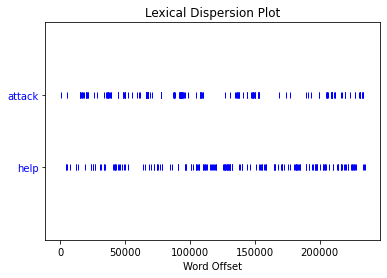

In [186]:
# A utility for displaying lexical dispersion.
zelda_text.dispersion_plot(['attack','help'])

The dispersion plot illustrates the homogeneity of a word (or set of words) across the documents of a corpus. 'attack' shows regularly among our corpus library and 'help' relevant info appears intensively. This dispersion to some extend indicates Zelda world is full of risks and fights.

_2.find the top 6 races of allies by counting how many characters of each race there are in df_characters. Save the list of races and use it to create a new dispersion plot. What do you observe?_

In [203]:
#  counting how many characters of each race there are in df_characters
race_count = df_characters['Race'].value_counts()
race_count[0:6]

Hylian     215
Sheikah    142
Gerudo      78
Goron       36
Zora        30
Rito        27
Name: Race, dtype: int64

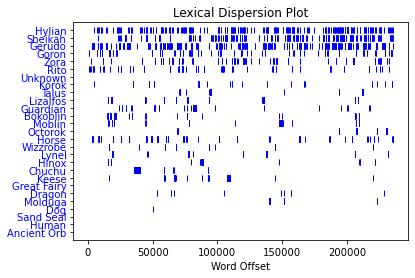

In [208]:
zelda_text.dispersion_plot(list(race_count.index))

The dispersion plot shows the lexical dispersion of words. The top 6 races have considerably more lines than the rest,which indicates they appear more frequently in our corpus.And the story is more centred in 3 races 'Hylian', 'Sheikan' and 'Gerudo'.

_3.try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe)._

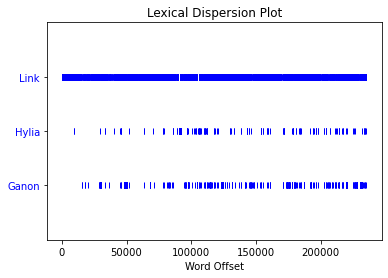

In [214]:
gender_list = ['Link','Hylia','Ganon']
zelda_text.dispersion_plot(gender_list)

From week5 exercises, we found top 3 in-degree nodes 'Link','Hylia','Calamity Ganon'.Plot their dispersion, Link has the most in-degree and is active through the whole corpus, so he is the main character in the BtoW for sure. Hylia shows up intervally, I guess she plays an important role in guiding Link and pushing the story process.Ganon debuts after Link coming out for a while, which gives players time to be familiar with game operation. Gradually, in the medium to later term, Ganon appears frequently, the game plot is pushed to climax.

**What is a bigram? How does it relate to ```collocations```. Explain in your own words.**

A collocation is a sequence of words that occur together unusually often, while bigrams are like word pairs. Collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The ```collocations()``` function does this for us.

In [215]:
zelda_text.collocations()

References =="; Nomenclature ==\; Biography ==\; See Also; Divine
Beast; Also ==\; Gerudo Town; Ancient Shrine; Beast Vah; Calamity
Ganon; Side Quest; Link speaks; Princess Zelda; Gallery ==\; Sheikah
Slate; Hyrule Castle; Zelda series; Wind Waker; years prior; 000 years


**Review the discussion of conditionals in Sec. 4. Find all words in the ZeldaWiki Text starting with the letter b. Show the first 5 in alphabetical order.**

In [225]:
b_list = [i for i in zelda_text if i.startswith('b')]
sorted(b_list)[0:5]

['baby', 'baby', 'back', 'back', 'back']

**Use .index() to find the index of the word Cherry. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.**

In [226]:
zelda_text.index('Cherry')

34166

In [233]:
text[34166:34176]

['Cherry', ',', 'is', 'a', 'character', 'in', 'Breath', 'of', 'the', 'Wild']

**Review the discussion of looping with conditions in Sec 4. Use a combination of for and if statements to loop over the words of the ZeldaWiki Text and print the 5 longest uppercase words, one per line.**

In [284]:
upwds = {}
for i in zelda_text:
    if i.isupper():
        upwds[i] = len(i)

sorted(upwds.items(),key=lambda x:x[1],reverse=True)[:5]

# solution 2
# sorted(upwds,key=len,reverse=True)[:5]

[('CRAAAAACK', 9),
 ('BOOOOOM', 7),
 ('BZZBZZT', 7),
 ('3000HP', 6),
 ('BZZBZZ', 6)]

### Exercise 2: Basic stats

**How many tokens are there in the ZeldaWiki Text? How many distinct tokens are there?**

In [337]:
print('Tokens:',len(zelda_text))
print('Distinct tokens(Type)',len(set(zelda_text)))

Tokens: 235539
Distinct tokens(Type) 11657


**Explain in your own words what aspect of language lexical diversity describes.**

_1.Compute the lexical diversity of the ZeldaWiki Text;_

In [137]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [338]:
lexical_diversity(zelda_text)

0.049490742509732996

The function has an input of text and returns the result of ```len(set(text)) / len(text)```. It evaluates the percentage of distinct words of the total number of words.

_2.Compute the lexical diversity related to allies and enemies (bosses inlcuded). Comment your results_

In [57]:
allies_corpus = PlaintextCorpusReader(corpus_root, '.*.txt')
enemies_corpus = PlaintextCorpusReader(corpus_root, '.*.txt')

In [53]:
allies_list = []
enemies_list = []
for i in df_characters.Name:
    if df_characters.loc[df_characters.Name == i].Role.values == 'Ally':
        i = '{}.{}'.format(i,'txt')
        allies_list.append(i)
    elif df_characters[df_characters.Name == i].Role.values == ('Enemy' or 'Boss'):
        i = '{}.{}'.format(i,'txt')
        enemies_list.append(i)

In [54]:
allies_corpus = PlaintextCorpusReader(corpus_root, allies_list)
enemies_corpus = PlaintextCorpusReader(corpus_root, enemies_list)

In [55]:
allies_text = nltk.Text(allies_corpus.words())
anemies_text = nltk.Text(enemies_corpus.words())

In [56]:
print('Lexical diversity related to allies:',lexical_diversity(allies_text))
print('Lexical diversity related to enemies:',lexical_diversity(anemies_text))

Lexical diversity related to allies: 0.05386694937715346
Lexical diversity related to enemies: 0.09111953470875893


There ratio of distinct words to tokens are 5.3%(allies) and 9.1%(enemies) respectively. So the lexical richness related to enemies is larger, which shows that the names of enemies are more unique.

**Create frequency distributions for the ZeldaWiki Text, including the cumulative frequency plot for the 75 most common tokens.**

In [61]:
fdist = nltk.FreqDist(text)
print(fdist)

<FreqDist with 11657 samples and 235539 outcomes>


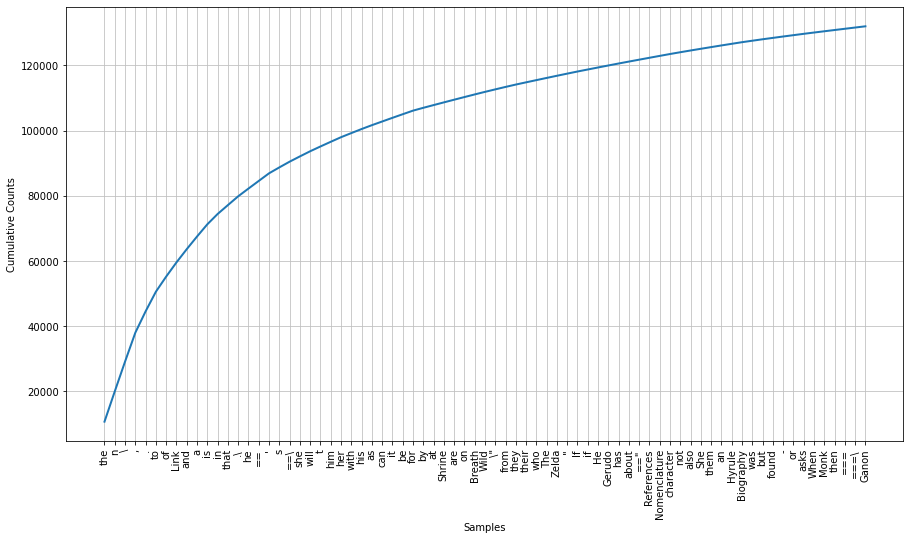

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [112]:
plt.figure(figsize=(15,8))
fdist.plot(75, cumulative=True)

**Find all the four-letter tokens in the ZeldaWiki Text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.**

In [126]:
# find frequently occurring long words
# FreqDist helps eliminate frequent short words
# longer than 3 characters, that occur more than 7 times:
sorted(w for w in set(text) if len(w) > 3 and fdist[w] > 7)

['.\\"\\',
 '====',
 '====\\',
 '===\\',
 'Abandoned',
 'According',
 'Additionally',
 'Adventure',
 'Adventures',
 'After',
 'Afterwards',
 'Agahnim',
 'Ages',
 'Agus',
 'Akkala',
 'Akrah',
 'Aliza',
 'Also',
 'Although',
 'Amali',
 'Amber',
 'Amira',
 'Anche',
 'Ancient',
 'Anjean',
 'Anly',
 'Appearances',
 'Armor',
 'Arrow',
 'Arrows',
 'Asaagh',
 'Ashai',
 'Asking',
 'Aster',
 'Attack',
 'Awakening',
 'Babi',
 'Baddek',
 'Ballad',
 'Bananas',
 'Banji',
 'Barrels',
 'Barta',
 'Battle',
 'Baumar',
 'Bayge',
 'Bazaar',
 'Bazz',
 'Beast',
 'Beasts',
 'Because',
 'Bedoli',
 'Beedle',
 'Beetle',
 'Before',
 'Benja',
 'Between',
 'Biography',
 'Black',
 'Blade',
 'Bladon',
 'Blood',
 'Bludo',
 'Blue',
 'Blynne',
 'Boko',
 'Bokoblin',
 'Bokoblins',
 'Bolson',
 'Bomb',
 'Bombs',
 'Bone',
 'Bonus',
 'Boomerang',
 'Boots',
 'Boss',
 'Bosses',
 'BotW',
 'Botrick',
 'Bows',
 'Bozai',
 'Branli',
 'Breath',
 'Bridge',
 'Bridle',
 'Brigo',
 'Brokka',
 'Bros',
 'Brothers',
 'Buliara',
 'Cadence',


**What does the following code do? ```sum(len(w) for w in ZeldaWiki)``` Can you use it to work out the average token length of the ZeldaWiki Text?**

This code calculate the sum of total token lengths of the ZeldaWiki Text.

In [132]:
avg_token_len = sum(len(w) for w in text)/len(text)
print('The average token length is',avg_token_len)

The average token length is 3.8360186635758833


**Define a function:**

_called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the ZeldaWiki Text;_

In [ ]:
def vocab_size(text):
    vocab = set(text)
    vocab_size = len(vocab)
    return vocab_size

In [136]:
vocab_size(text)

11657

_```percent(word, text)``` that calculates how often a given ```word``` occurs in a `text`, and expresses the result as a percentage. Apply it to the ZeldaWiki Text to compute the percentage for Link (our beloved hero)_

In [150]:
def percent(word, text):
    return 100 * text.count(word) / len(set(text))

In [151]:
percent('Link',text)

37.265162563266706

# Part 3: Working with NLTK and other types of text

## exercise 4, 8, 11, 15, 16, 17, 18

**4. Read in the texts of the State of the Union addresses, using the `state_union` corpus reader. Count occurrences of `men`, `women`, and `people` in each document. What has happened to the usage of these words over time?**

In [179]:
state_union.words()

['PRESIDENT', 'HARRY', 'S', '.', 'TRUMAN', "'", 'S', ...]

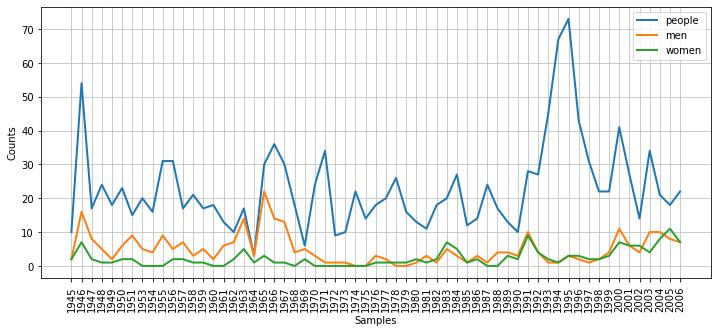

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [183]:
# record the number of times each sample occurred
# given the condition under which the experiment was run.
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])                 #[:4] match the Year
    for fileid in state_union.fileids() #filename: Year-Name.txt
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower().startswith(target))
plt.figure(figsize=(12,5))
cfd.plot()

* This plot starts from post war period to 2006. 
* In 1963, the counts of people and men went down and reached in the same level in 1964, only a little higher than that of women. 
* But after 1964, the usages of men and people rose remarkably may out of conscription for Vietnam war and Civil Rights Movement and then fell fiercely from 1966 to 1969 due to antiwar revelution.
* In 1969, The Counterculture Revolution brought public eyesights on people.
* Since 1971, the usages of men and women were almost equal thanks to nationwide success of women right campaigns.
* After 1991, it's post-cold war era, the US experienced a series of natural disasters, wars, attacks, Northridge earthquake, Chicago heat wave, terrorist attacks,resulting in public focus on people's lives, which indicate some top points of the plot.
* Generally, when there were wars and political campaigns, the usages of people always rose.

**8.Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).**

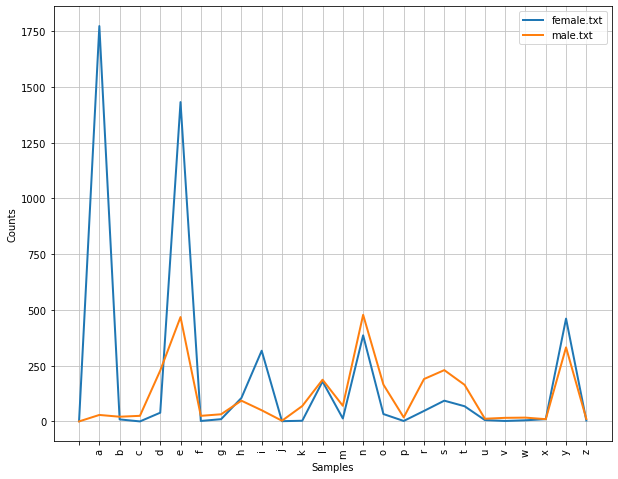

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [203]:
names = nltk.corpus.names

cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
plt.figure(figsize=(10,8))
cfd.plot()

For felmale.txt, 'a' was the most used initial letter, while 'e' and 'n' for male.txt. However, female's most frequent letters('a'&'e') were far more used than male's. Plus, 'n' and 's' were more used by men and 'y' was more used by women.

**11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?**

In [210]:
# The Brown Corpus is a convenient resource for 
# studying systematic differences between genres
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
modals = ['can', 'could', 'may', 'might', 'must', 'will']
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
# tabulation limited to the specified samples and conditions
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


**15.Write a program to find all words that occur at least three times in the Brown Corpus.**

In [221]:
brown_unique_words = set(brown.words())
brown_fd=nltk.FreqDist(brown.words())
at_least_3times=[word for word in brown_unique_words if brown_fd[word]>2]
print(at_least_3times)

['availability', 'anchor', 'NBS', 'excitatory', 'Cliburn', 'willy-nilly', 'Clark', 'Whoever', 'Commissioner', 'recommended', 'Golden', 'tonight', 'believes', 'microscopic', 'practice', 'Horn', '28th', 'anticipations', 'slid', 'novelist', 'conditioners', 'announcing', 'i', 'achieved', 'strung', 'irregularities', 'complicity', 'greens', 'incepting', 'wealthy', 'dating', 'teams', 'presumptuous', 'Larkin', 'horse', 'plaster', 'Sandburg', 'Warren', 'silhouette', 'involutorial', 'Legion', 'vectors', 'masks', 'alcoves', 'craft', 'stirred', 'buzz', 'thicker', 'Ado', 'beside', 'woo', 'it', 'valley', '1959-1960', 'whir', 'Kenneth', 'choked', 'Machine', 'blithely', 'Roleplaying', 'Trial', 'ambivalent', 'vanishing', 'competing', 'Congolese', 'irritable', 'difficult', 'steep', 'fragrant', 'Emancipation', 'maintains', 'ray', 'thousand', 'totalled', 'Q', '$37', 'cf.', 'Yankee', 'Providence', 'doorstep', 'questionnaire', 'tungsten', 'Stevie', 'relation', 'Laboratories', 'averaging', 'dispensation', 's

**16.Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres `(nltk.corpus.brown.categories())`. Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?**

In [ ]:
print("Category, Tokens, Types, Lexical Diversity")
for cat in nltk.corpus.brown.categories():
    category_words = brown.words(categories=cat)
    print(cat,len(category_words),len(set(category_words)),lexical_diversity(category_words))

**17.Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.**

In [302]:
# stopwords:high-frequency words,should be filtered out before further processing
def top_freq_non_stopwords(num,text): # text type list
    stpwds = stopwords.words('english')
    # Get frequency dist of the text
    words_fd_include = nltk.FreqDist(text)
    # sort dist by frequency
    words_fd_sort = sorted(words_fd_include.items(),key=lambda w:w[1],reverse=True)
    # exclude stopwords
    words_fd_exclude = [w[0] for w in words_fd_sort if w[0].lower() not in stpwds and w[0].lower().isalpha()]
    return words_fd_exclude[0:num]

In [303]:
top_freq_non_stopwords(50,brown.words())

['one',
 'would',
 'said',
 'could',
 'time',
 'two',
 'may',
 'first',
 'like',
 'man',
 'made',
 'new',
 'must',
 'also',
 'Af',
 'even',
 'back',
 'years',
 'many',
 'much',
 'way',
 'people',
 'little',
 'make',
 'good',
 'well',
 'work',
 'men',
 'still',
 'see',
 'get',
 'long',
 'world',
 'know',
 'life',
 'might',
 'us',
 'never',
 'year',
 'last',
 'day',
 'came',
 'used',
 'great',
 'go',
 'right',
 'come',
 'take',
 'New',
 'another']

In [298]:
# SOLUTION 2
def top_freq_nt_stpwds(num,text):
    # fd that includes stop words
    most_freq_50_fd = nltk.FreqDist(text)
    words=[word for word in most_freq_50_fd]
    # fd that excludes stop words
    for word in words:
        if word.lower() in nltk.corpus.stopwords.words('english') or not word.isalpha():
            most_freq_50_fd.pop(word)
    # use .most_common() method to find top frequent words
    return most_freq_50_fd.most_common(num)

In [299]:
top_freq_nt_stpwds(50,brown.words())

[('one', 2873),
 ('would', 2677),
 ('said', 1943),
 ('could', 1580),
 ('time', 1556),
 ('two', 1311),
 ('may', 1292),
 ('first', 1242),
 ('like', 1237),
 ('man', 1151),
 ('made', 1122),
 ('new', 1060),
 ('must', 1003),
 ('also', 999),
 ('Af', 995),
 ('even', 985),
 ('back', 950),
 ('years', 943),
 ('many', 925),
 ('much', 900),
 ('way', 892),
 ('people', 811),
 ('little', 788),
 ('make', 768),
 ('good', 767),
 ('well', 757),
 ('work', 755),
 ('men', 736),
 ('still', 731),
 ('see', 728),
 ('get', 719),
 ('long', 713),
 ('world', 684),
 ('know', 679),
 ('life', 676),
 ('might', 670),
 ('us', 670),
 ('never', 664),
 ('year', 649),
 ('last', 636),
 ('day', 623),
 ('came', 621),
 ('used', 610),
 ('great', 608),
 ('go', 605),
 ('right', 597),
 ('come', 589),
 ('take', 577),
 ('New', 575),
 ('another', 573)]

**18.Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.**

In [322]:
stpwds = stopwords.words('english')
bgrms = list(nltk.bigrams(brown.words()))

tuple

In [ ]:
def top_freq_bigrams(num,text):
    stpwds = stopwords.words('english')
    bgrms = nltk.bigrams(text)
    lst = list(nltk.bigrams(text))
    for bundle in lst:
        if (bundle[0] or bundle[1] in stpwds) or not bundle[0].isalpha() or bundle[1].isalpha():
            bgrms.remove(bundle)
    return bgrms.most_common(num)

In [ ]:
top_freq_bigrams(50,brown.words())

## exercise 2.8.23 on Zipf's law

**23. Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.**

_a. Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?_

In [671]:
def zipfs_law(text): # text: string/list
    import pylab,math
    # get word frequency distribution
    fqds = nltk.FreqDist(text)
    # get word frequency list and word rank
    freq = [fqds[wd] for wd in fqds]
    num = max(freq)
    rank = range(len(freq))
    
    # plot word frequency against word rank
    pylab.plot(rank,freq)
    
    # set limits,scales,labels and title of the plot
    limy = math.log(num,10)+1
    iimx = math.log(len(freq),10)+1
    
    pylab.ylim(10**0, 10**limy)
    pylab.yscale('log')
    pylab.xlim(10**0, 10**iimx)
    pylab.xscale('log')
    pylab.xlabel('word rank')
    pylab.ylabel('word frequency')
    pylab.title('Zipf\'s law')

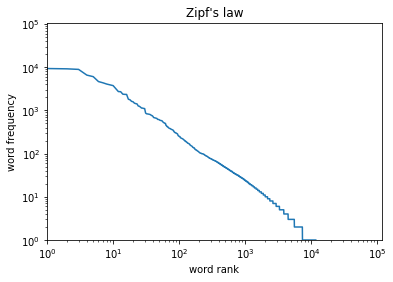

In [672]:
zipfs_law(zelda_text)

_b. Generate random text, e.g., using `random.choice("abcdefg ")`, taking care to include the space character. You will need to `import random` first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?_

In [696]:
def rand_text(text,times):
    import random,nltk
    rands = ''
    for i in range(1000):
        rands+=random.choice(text)+' ' #include the space character
    # tokenize the concatenation string 
    tokens = [token for token in nltk.word_tokenize(rands) if token.isalpha()]
    return tokens

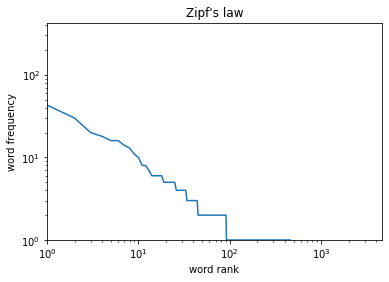

In [697]:
rdtxt = rand_text(zelda_text,10000)
zipfs_law(rdtxt)

**What do you make of Zipf's Law in the light of this?**<br>
The rank-frequency distribution is an inverse relation. Word ranks high are more frequent. It's related to power law distribution.

**Connection between Zipf's law and X property of the Barabasi-Albert networks**

They are both scale-free and have preferential attachment mechanism. This multiplicative stochastic growth process New nodes are more likely to connect with exsiting nodes with large degrees. 

**Other important instances of power-laws found on the internet.**

1. It is present at social platforms. Top influencers have millions followers, while most have only a few. Besides, a number of posts attract enormous attention(like,comment,share) while some posts have few popularity.
2. In vedio sharing websites like Youtube, a small subset of the whole will get a disproportionate amount of traffic.
3. For digital newspaper forum, while there are millions of blogs out there, a relatively small number of them attract most of the readership.